In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')
edu_df = pd.read_csv('states_all.csv')

In [3]:
#Question01
edu_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [6]:
edu_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1.224000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.224000e+03,...,1632.000000,1632.000000,1632.000000,1.020000e+03,1.071000e+03,1.632000e+03,565.000000,602.000000,650.000000,562.000000
mean,2002.075219,9.175416e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,4.299509e+05,...,69166.507966,68106.537377,58420.870711,5.779547e+05,2.820691e+05,9.139695e+05,236.327434,278.280731,218.806154,263.558719
std,9.568621,1.066514e+06,1.175962e+07,1.146992e+06,5.549735e+06,5.489562e+06,1.199279e+07,6.300569e+06,3.357214e+06,5.347893e+05,...,79957.990356,77965.847263,67438.530709,6.757837e+05,3.307098e+05,1.055893e+06,9.285505,10.343482,7.681805,6.612601
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,1994.000000,2.645145e+05,2.189504e+06,1.899575e+05,1.165776e+06,7.151210e+05,2.170404e+06,1.171336e+06,6.380760e+05,1.034492e+05,...,18971.500000,19594.250000,16076.500000,1.649250e+05,8.060800e+04,2.480832e+05,232.000000,272.000000,215.000000,260.000000
50%,2002.000000,6.499335e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,1.525471e+06,2.717040e+05,...,49087.000000,47880.000000,39408.000000,4.051115e+05,1.869190e+05,6.458050e+05,238.000000,280.500000,220.000000,265.000000
75%,2010.000000,1.010532e+06,1.084516e+07,8.279320e+05,5.055548e+06,4.755293e+06,1.074420e+07,5.561959e+06,3.222924e+06,5.172222e+05,...,78504.250000,78976.000000,69397.250000,6.439752e+05,3.223280e+05,1.043420e+06,242.000000,286.000000,224.000000,268.000000
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.000000,301.000000,237.000000,280.000000


In [7]:
edu_df.describe(include='all')

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715,1715,1715.000000,1.224000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,...,1632.000000,1632.000000,1632.000000,1.020000e+03,1.071000e+03,1.632000e+03,565.000000,602.000000,650.000000,562.000000
unique,1715,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1992_ALABAMA,ALABAMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2002.075219,9.175416e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,...,69166.507966,68106.537377,58420.870711,5.779547e+05,2.820691e+05,9.139695e+05,236.327434,278.280731,218.806154,263.558719
std,NaN,NaN,9.568621,1.066514e+06,1.175962e+07,1.146992e+06,5.549735e+06,5.489562e+06,1.199279e+07,6.300569e+06,...,79957.990356,77965.847263,67438.530709,6.757837e+05,3.307098e+05,1.055893e+06,9.285505,10.343482,7.681805,6.612601
min,NaN,NaN,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,NaN,NaN,1994.000000,2.645145e+05,2.189504e+06,1.899575e+05,1.165776e+06,7.151210e+05,2.170404e+06,1.171336e+06,...,18971.500000,19594.250000,16076.500000,1.649250e+05,8.060800e+04,2.480832e+05,232.000000,272.000000,215.000000,260.000000
50%,NaN,NaN,2002.000000,6.499335e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,...,49087.000000,47880.000000,39408.000000,4.051115e+05,1.869190e+05,6.458050e+05,238.000000,280.500000,220.000000,265.000000
75%,NaN,NaN,2010.000000,1.010532e+06,1.084516e+07,8.279320e+05,5.055548e+06,4.755293e+06,1.074420e+07,5.561959e+06,...,78504.250000,78976.000000,69397.250000,6.439752e+05,3.223280e+05,1.043420e+06,242.000000,286.000000,224.000000,268.000000


In [9]:
edu_df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [10]:
#From the previous assignments, I may said that, the data in this file has missing values and outlier values, for this reason
#before work on that, filling out the missing values and cleaning the outlier values would be advisable

In [20]:
#Question02
stateCal=edu_df.loc[(edu_df['STATE'] == 'CALIFORNIA')]
stateCal
state_edu_year_rev_exp=stateCal[['YEAR','TOTAL_REVENUE', 'TOTAL_EXPENDITURE']].copy()

In [21]:
state_edu_year_rev_exp

,YEAR,TOTAL_REVENUE,TOTAL_EXPENDITURE
4,1992,26260025.0,27138832.0
55,1993,28043338.0,28110986.0
106,1994,23440845.0,23012688.0
157,1995,29512214.0,30097549.0
208,1996,31282981.0,31561692.0
259,1997,35614934.0,33862281.0
310,1998,39183018.0,38087666.0
361,1999,41393435.0,40834643.0
412,2000,46628207.0,45829753.0
463,2001,53288943.0,52082540.0


In [34]:
#As we can see, we have some null values, they would not included to the graph


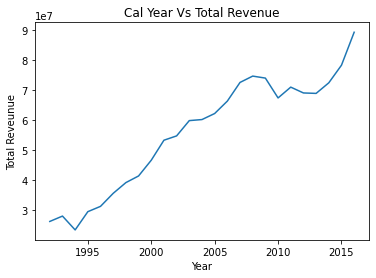

In [35]:
plt.plot(state_edu_year_rev_exp['YEAR'], state_edu_year_rev_exp['TOTAL_REVENUE'])
plt.title('Cal Year Vs Total Revenue')
plt.xlabel('Year')
plt.ylabel('Total Reveunue')
plt.show()

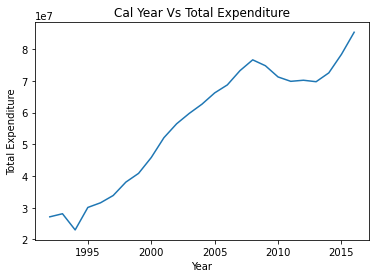

In [36]:
plt.plot(state_edu_year_rev_exp['YEAR'], state_edu_year_rev_exp['TOTAL_EXPENDITURE'])
plt.title('Cal Year Vs Total Expenditure')
plt.xlabel('Year')
plt.ylabel('Total Expenditure')
plt.show()

In [37]:
#For example, with the blow of internet bubble in 1994 revenues and expendetures reached trough. In 2008 we are seeing peaks, 
#After that a trough. That time the housing bubble collapsed this is what happened.

In [41]:
#Question3
state_edu_year_math_read=stateCal[['YEAR','AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',"AVG_READING_4_SCORE","AVG_READING_8_SCORE"]].copy()

In [44]:
state_edu_year_math_read

,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
4,1992,208.0,261.0,202.0,NaN
55,1993,NaN,NaN,NaN,NaN
106,1994,NaN,NaN,197.0,NaN
157,1995,NaN,NaN,NaN,NaN
208,1996,NaN,NaN,NaN,NaN
259,1997,NaN,NaN,NaN,NaN
310,1998,NaN,NaN,202.0,252.0
361,1999,NaN,NaN,NaN,NaN
412,2000,213.0,260.0,NaN,NaN
463,2001,NaN,NaN,NaN,NaN


In [46]:
#As seen from the dataset, there are missing values, to be able to make a proper comperasion we will drop the NaN values
reading_or_math=state_edu_year_math_read.dropna()

In [50]:
#To make proper comperison, we will calculate the mean values.
print("The AVG_MATH_4_SCORE is",reading_or_math["AVG_MATH_4_SCORE"].mean())

The AVG_MATH_4_SCORE is 231.77777777777777


In [51]:
print("The AVG_MATH_8_SCORE is",reading_or_math["AVG_MATH_8_SCORE"].mean())

The AVG_MATH_8_SCORE is 272.55555555555554


In [52]:
print("The AVG_READING_4_SCORE is",reading_or_math["AVG_READING_4_SCORE"].mean())

The AVG_READING_4_SCORE is 211.11111111111111


In [53]:
print("The AVG_READING_8_SCORE is",reading_or_math["AVG_READING_8_SCORE"].mean())

The AVG_READING_8_SCORE is 255.88888888888889


In [54]:
#Based on the results, Math_4 is more successfull than Reading_4 (231 vs 211) and Math_4 is more successfull than Reading_4 (272 vs 255)
#So in California, students success rate is greater n math


,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
565,2003,227.0,267.0,206.0,251.0
667,2005,230.0,269.0,207.0,250.0
769,2007,230.0,270.0,209.0,251.0
871,2009,232.0,270.0,210.0,253.0
973,2011,234.0,273.0,211.0,255.0
1075,2013,234.0,276.0,213.0,262.0
1177,2015,232.0,275.0,213.0,259.0
1309,2017,232.0,277.0,215.0,263.0
1666,2019,235.0,276.0,216.0,259.0


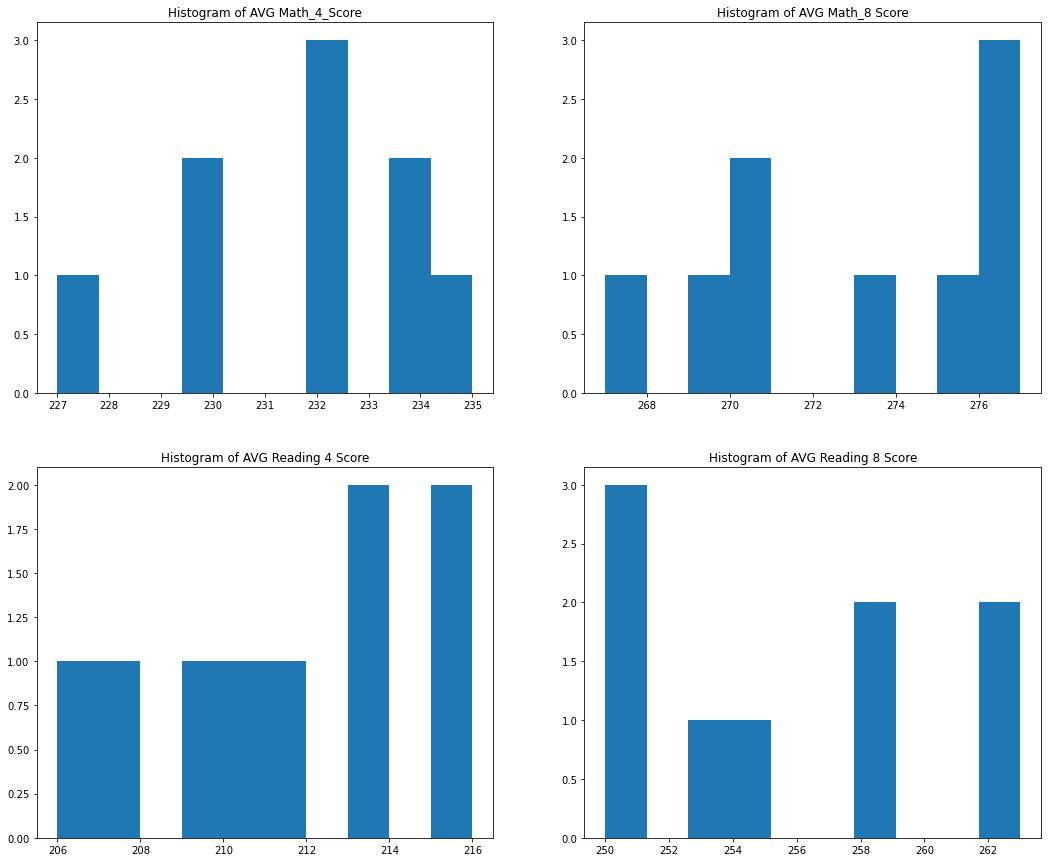

In [57]:
#Question 4
#To be able to see the distribution, we will use histogram
plt.figure(figsize=(18,15))

plt.subplot(2, 2, 1)
plt.hist(reading_or_math["AVG_MATH_4_SCORE"])
plt.title("Histogram of AVG Math_4_Score")

plt.subplot(2, 2, 2)
plt.hist(reading_or_math["AVG_MATH_8_SCORE"])
plt.title("Histogram of AVG Math_8 Score")

plt.subplot(2, 2, 3)
plt.hist(reading_or_math["AVG_READING_4_SCORE"])
plt.title("Histogram of AVG Reading 4 Score")

plt.subplot(2, 2, 4)
plt.hist(reading_or_math["AVG_READING_8_SCORE"])
plt.title("Histogram of AVG Reading 8 Score")

plt.show()

In [58]:
#AVG_MATH_4_SCORE is close to the normal distribution
#AVG_MATH_8_SCORE and AVG_READING_4_SCORE is close to the negative skew distribution
#AVG_READING_8_SCORE is close to the positive skew distribution


In [60]:
#Question 5
#state_edu_year_math_read is the not filled version of the dataset
state_edu_year_math_read

,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
4,1992,208.0,261.0,202.0,NaN
55,1993,NaN,NaN,NaN,NaN
106,1994,NaN,NaN,197.0,NaN
157,1995,NaN,NaN,NaN,NaN
208,1996,NaN,NaN,NaN,NaN
259,1997,NaN,NaN,NaN,NaN
310,1998,NaN,NaN,202.0,252.0
361,1999,NaN,NaN,NaN,NaN
412,2000,213.0,260.0,NaN,NaN
463,2001,NaN,NaN,NaN,NaN


In [61]:
state_edu_year_math_read.describe()

,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,33.000000,11.000000,12.000000,13.000000,11.000000
mean,2002.030303,227.909091,269.166667,208.230769,255.000000
std,9.722670,8.960519,6.965282,5.614770,4.898979
min,1986.000000,208.000000,256.000000,197.000000,250.000000
25%,1994.000000,228.500000,265.500000,206.000000,251.000000
50%,2002.000000,232.000000,270.000000,209.000000,253.000000
75%,2010.000000,233.000000,275.250000,213.000000,259.000000
max,2019.000000,235.000000,277.000000,216.000000,263.000000


In [85]:
#filling with mean
state_edu_year_math_read_mean=state_edu_year_math_read.copy()
state_edu_year_math_read_median=state_edu_year_math_read.copy()
state_edu_year_math_read_interpolation=state_edu_year_math_read.copy()

In [86]:
state_edu_year_math_read_mean["AVG_MATH_4_SCORE"]=state_edu_year_math_read_mean["AVG_MATH_4_SCORE"].fillna(state_edu_year_math_read_mean["AVG_MATH_4_SCORE"].mean())

In [87]:
state_edu_year_math_read_mean["AVG_MATH_8_SCORE"]=state_edu_year_math_read_mean["AVG_MATH_8_SCORE"].fillna(state_edu_year_math_read_mean["AVG_MATH_8_SCORE"].mean())

In [88]:
state_edu_year_math_read_mean["AVG_READING_4_SCORE"]=state_edu_year_math_read_mean["AVG_READING_4_SCORE"].fillna(state_edu_year_math_read_mean["AVG_READING_4_SCORE"].mean())

In [89]:
state_edu_year_math_read_mean["AVG_READING_8_SCORE"]=state_edu_year_math_read_mean["AVG_READING_8_SCORE"].fillna(state_edu_year_math_read_mean["AVG_READING_8_SCORE"].mean())

In [90]:
state_edu_year_math_read_mean.describe()

,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,33.000000,33.000000,33.000000,33.000000,33.000000
mean,2002.030303,227.909091,269.166667,208.230769,255.000000
std,9.722670,5.009083,4.083758,3.438330,2.738613
min,1986.000000,208.000000,256.000000,197.000000,250.000000
25%,1994.000000,227.909091,269.166667,208.230769,255.000000
50%,2002.000000,227.909091,269.166667,208.230769,255.000000
75%,2010.000000,227.909091,269.166667,208.230769,255.000000
max,2019.000000,235.000000,277.000000,216.000000,263.000000


In [91]:
state_edu_year_math_read_median["AVG_MATH_4_SCORE"]=state_edu_year_math_read_median["AVG_MATH_4_SCORE"].fillna(state_edu_year_math_read_median["AVG_MATH_4_SCORE"].median())

In [92]:
state_edu_year_math_read_median["AVG_MATH_8_SCORE"]=state_edu_year_math_read_median["AVG_MATH_8_SCORE"].fillna(state_edu_year_math_read_median["AVG_MATH_8_SCORE"].median())

In [93]:
state_edu_year_math_read_median["AVG_READING_8_SCORE"]=state_edu_year_math_read_median["AVG_READING_8_SCORE"].fillna(state_edu_year_math_read_median["AVG_READING_8_SCORE"].median())

In [94]:
state_edu_year_math_read_median["AVG_READING_4_SCORE"]=state_edu_year_math_read_median["AVG_READING_4_SCORE"].fillna(state_edu_year_math_read_median["AVG_READING_4_SCORE"].median())

In [95]:
state_edu_year_math_read_median.describe()

,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,33.000000,33.000000,33.000000,33.000000,33.000000
mean,2002.030303,230.636364,269.696970,208.696970,253.666667
std,9.722670,5.378302,4.103998,3.459451,2.901149
min,1986.000000,208.000000,256.000000,197.000000,250.000000
25%,1994.000000,232.000000,270.000000,209.000000,253.000000
50%,2002.000000,232.000000,270.000000,209.000000,253.000000
75%,2010.000000,232.000000,270.000000,209.000000,253.000000
max,2019.000000,235.000000,277.000000,216.000000,263.000000


In [96]:
state_edu_year_math_read_interpolation.AVG_MATH_4_SCORE.interpolate(method ='linear', limit_direction ='forward')

4       208.000000
55      208.625000
106     209.250000
157     209.875000
208     210.500000
259     211.125000
310     211.750000
361     212.375000
412     213.000000
463     217.666667
514     222.333333
565     227.000000
616     228.500000
667     230.000000
718     230.000000
769     230.000000
820     231.000000
871     232.000000
922     233.000000
973     234.000000
1024    234.000000
1075    234.000000
1126    233.000000
1177    232.000000
1228    232.000000
1303    232.000000
1304    232.000000
1305    232.000000
1306    232.000000
1307    232.000000
1308    232.000000
1309    232.000000
1666    235.000000
Name: AVG_MATH_4_SCORE, dtype: float64

In [97]:
state_edu_year_math_read_interpolation.AVG_MATH_8_SCORE.interpolate(method ='linear', limit_direction ='forward')

4       261.000000
55      260.875000
106     260.750000
157     260.625000
208     260.500000
259     260.375000
310     260.250000
361     260.125000
412     260.000000
463     262.333333
514     264.666667
565     267.000000
616     268.000000
667     269.000000
718     269.500000
769     270.000000
820     270.000000
871     270.000000
922     271.500000
973     273.000000
1024    274.500000
1075    276.000000
1126    275.500000
1177    275.000000
1228    271.833333
1303    268.666667
1304    265.500000
1305    262.333333
1306    259.166667
1307    256.000000
1308    266.500000
1309    277.000000
1666    276.000000
Name: AVG_MATH_8_SCORE, dtype: float64

In [98]:
state_edu_year_math_read_interpolation.AVG_READING_4_SCORE.interpolate(method ='linear', limit_direction ='forward')

4       202.00
55      199.50
106     197.00
157     198.25
208     199.50
259     200.75
310     202.00
361     203.00
412     204.00
463     205.00
514     206.00
565     206.00
616     206.50
667     207.00
718     208.00
769     209.00
820     209.50
871     210.00
922     210.50
973     211.00
1024    212.00
1075    213.00
1126    213.00
1177    213.00
1228    213.25
1303    213.50
1304    213.75
1305    214.00
1306    214.25
1307    214.50
1308    214.75
1309    215.00
1666    216.00
Name: AVG_READING_4_SCORE, dtype: float64

In [99]:
state_edu_year_math_read_interpolation.AVG_READING_8_SCORE.interpolate(method ='linear', limit_direction ='forward')

4         NaN
55        NaN
106       NaN
157       NaN
208       NaN
259       NaN
310     252.0
361     251.5
412     251.0
463     250.5
514     250.0
565     251.0
616     250.5
667     250.0
718     250.5
769     251.0
820     252.0
871     253.0
922     254.0
973     255.0
1024    258.5
1075    262.0
1126    260.5
1177    259.0
1228    259.5
1303    260.0
1304    260.5
1305    261.0
1306    261.5
1307    262.0
1308    262.5
1309    263.0
1666    259.0
Name: AVG_READING_8_SCORE, dtype: float64

In [100]:
state_edu_year_math_read_interpolation

,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
4,1992,208.0,261.0,202.0,NaN
55,1993,NaN,NaN,NaN,NaN
106,1994,NaN,NaN,197.0,NaN
157,1995,NaN,NaN,NaN,NaN
208,1996,NaN,NaN,NaN,NaN
259,1997,NaN,NaN,NaN,NaN
310,1998,NaN,NaN,202.0,252.0
361,1999,NaN,NaN,NaN,NaN
412,2000,213.0,260.0,NaN,NaN
463,2001,NaN,NaN,NaN,NaN


In [101]:
state_edu_year_math_read_median

,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
4,1992,208.0,261.0,202.0,253.0
55,1993,232.0,270.0,209.0,253.0
106,1994,232.0,270.0,197.0,253.0
157,1995,232.0,270.0,209.0,253.0
208,1996,232.0,270.0,209.0,253.0
259,1997,232.0,270.0,209.0,253.0
310,1998,232.0,270.0,202.0,252.0
361,1999,232.0,270.0,209.0,253.0
412,2000,213.0,260.0,209.0,253.0
463,2001,232.0,270.0,209.0,253.0


In [102]:
state_edu_year_math_read_mean

,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
4,1992,208.000000,261.000000,202.000000,255.0
55,1993,227.909091,269.166667,208.230769,255.0
106,1994,227.909091,269.166667,197.000000,255.0
157,1995,227.909091,269.166667,208.230769,255.0
208,1996,227.909091,269.166667,208.230769,255.0
259,1997,227.909091,269.166667,208.230769,255.0
310,1998,227.909091,269.166667,202.000000,252.0
361,1999,227.909091,269.166667,208.230769,255.0
412,2000,213.000000,260.000000,208.230769,255.0
463,2001,227.909091,269.166667,208.230769,255.0


In [ ]:
#On interpolation, there are some unfilled values, for this sample, using it is not applicable, however for median and mean values filled

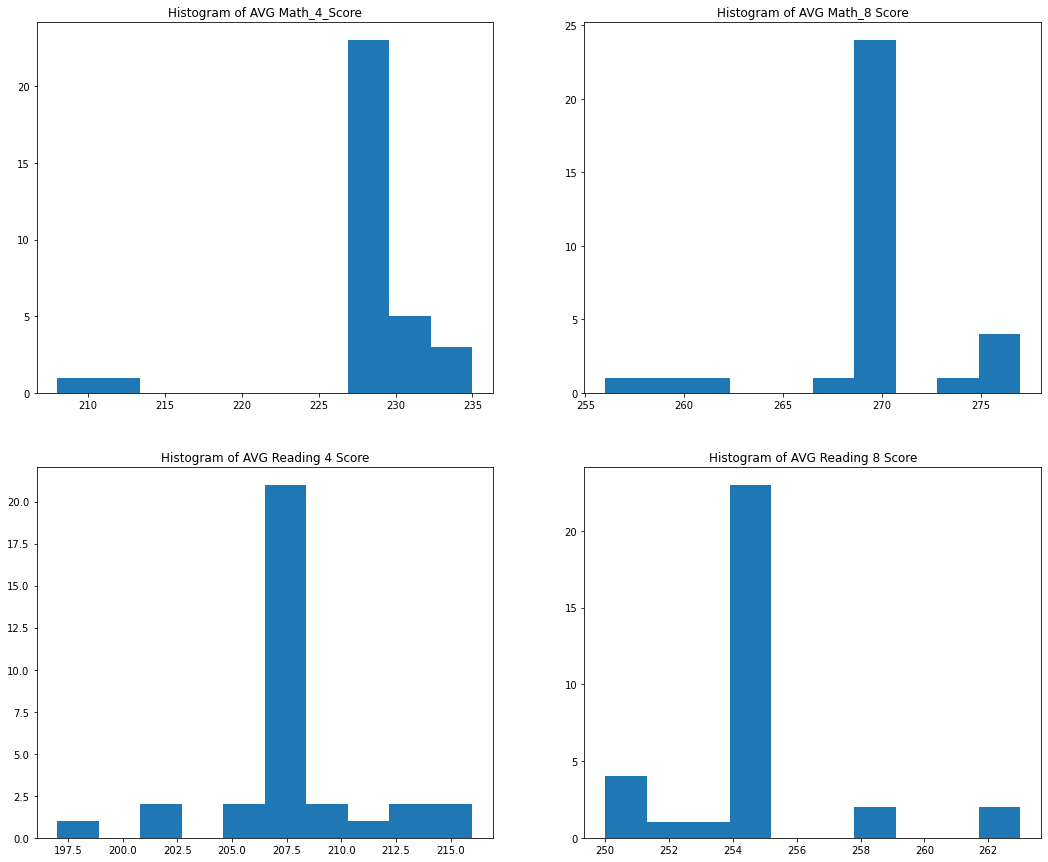

In [103]:
#For mean distributions:
plt.figure(figsize=(18,15))

plt.subplot(2, 2, 1)
plt.hist(state_edu_year_math_read_mean["AVG_MATH_4_SCORE"])
plt.title("Histogram of AVG Math_4_Score")

plt.subplot(2, 2, 2)
plt.hist(state_edu_year_math_read_mean["AVG_MATH_8_SCORE"])
plt.title("Histogram of AVG Math_8 Score")

plt.subplot(2, 2, 3)
plt.hist(state_edu_year_math_read_mean["AVG_READING_4_SCORE"])
plt.title("Histogram of AVG Reading 4 Score")

plt.subplot(2, 2, 4)
plt.hist(state_edu_year_math_read_mean["AVG_READING_8_SCORE"])
plt.title("Histogram of AVG Reading 8 Score")

plt.show()

In [104]:
#Math4 and Math 8 are negative negative skew, Reading 8 close to positive skew and Reading 4 is close to normal distribution

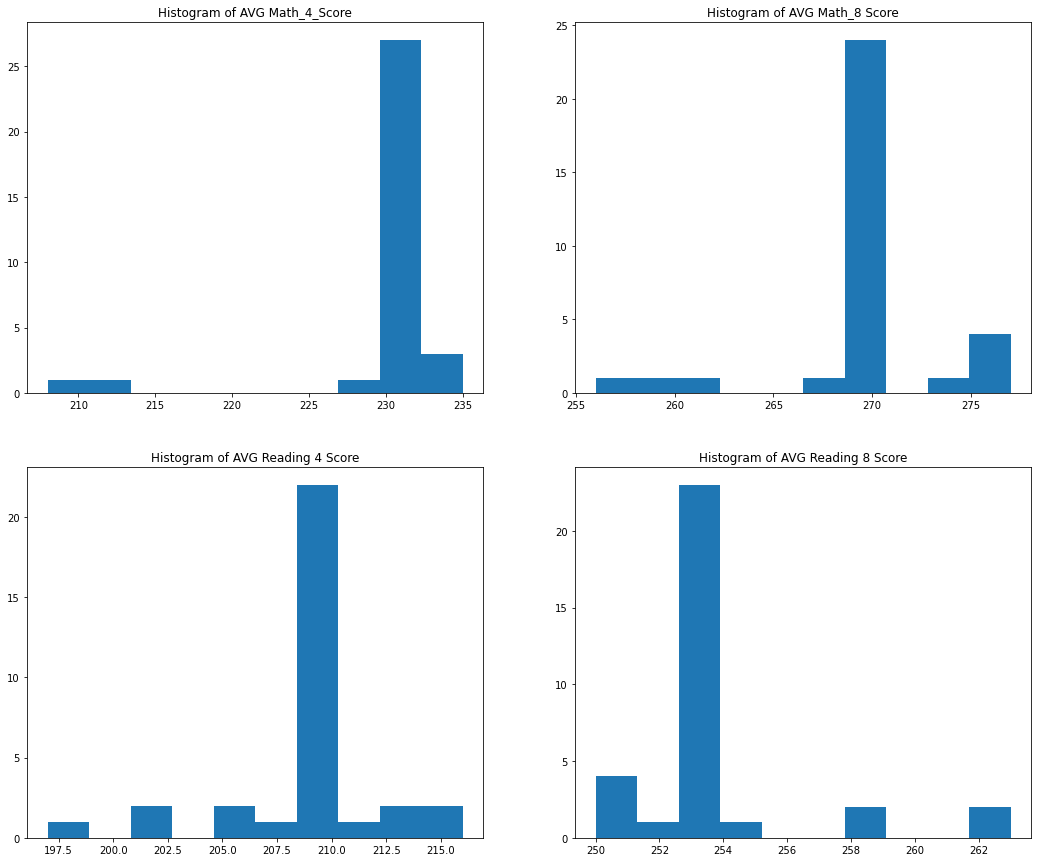

In [105]:
#For median distributions:
plt.figure(figsize=(18,15))

plt.subplot(2, 2, 1)
plt.hist(state_edu_year_math_read_median["AVG_MATH_4_SCORE"])
plt.title("Histogram of AVG Math_4_Score")

plt.subplot(2, 2, 2)
plt.hist(state_edu_year_math_read_median["AVG_MATH_8_SCORE"])
plt.title("Histogram of AVG Math_8 Score")

plt.subplot(2, 2, 3)
plt.hist(state_edu_year_math_read_median["AVG_READING_4_SCORE"])
plt.title("Histogram of AVG Reading 4 Score")

plt.subplot(2, 2, 4)
plt.hist(state_edu_year_math_read_median["AVG_READING_8_SCORE"])
plt.title("Histogram of AVG Reading 8 Score")

plt.show()

In [106]:
#Math4, Math8 and Reading 4 negative skew and Rading 8 positive skew

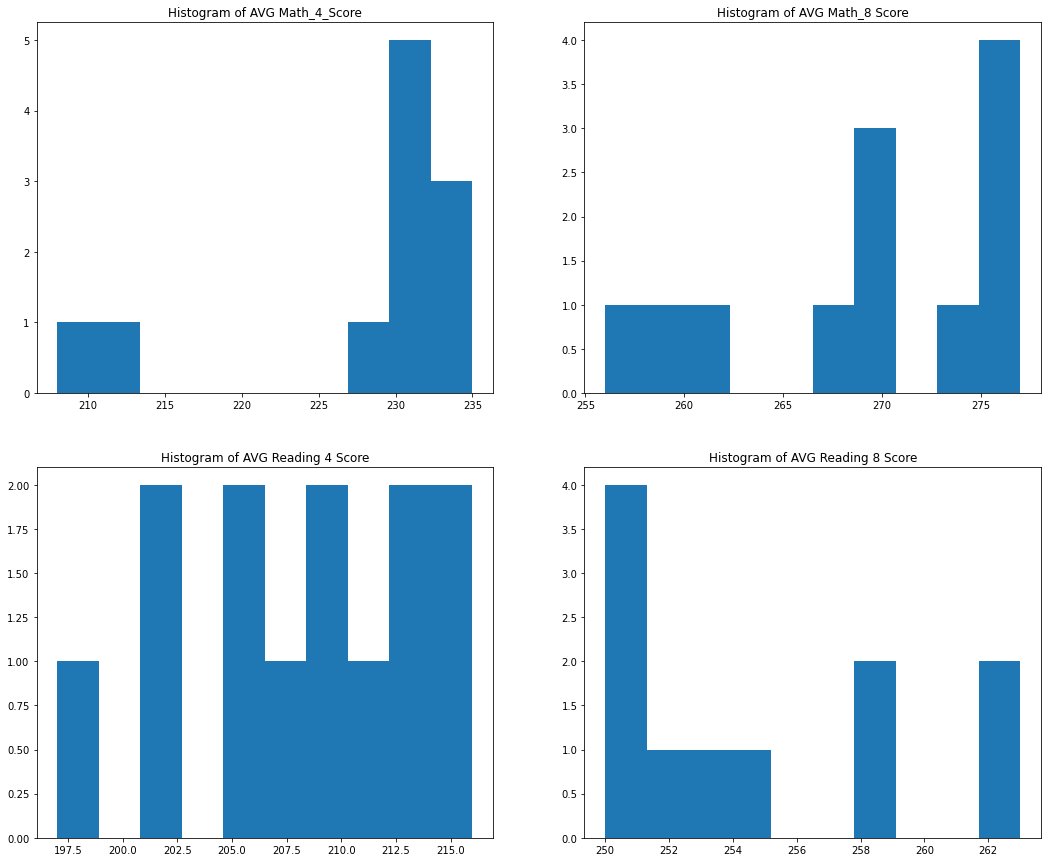

In [107]:
#For interpolation distributions:
plt.figure(figsize=(18,15))

plt.subplot(2, 2, 1)
plt.hist(state_edu_year_math_read_interpolation["AVG_MATH_4_SCORE"])
plt.title("Histogram of AVG Math_4_Score")

plt.subplot(2, 2, 2)
plt.hist(state_edu_year_math_read_interpolation["AVG_MATH_8_SCORE"])
plt.title("Histogram of AVG Math_8 Score")

plt.subplot(2, 2, 3)
plt.hist(state_edu_year_math_read_interpolation["AVG_READING_4_SCORE"])
plt.title("Histogram of AVG Reading 4 Score")

plt.subplot(2, 2, 4)
plt.hist(state_edu_year_math_read_interpolation["AVG_READING_8_SCORE"])
plt.title("Histogram of AVG Reading 8 Score")

plt.show()

In [ ]:
#Math4, Math8 and Reading 4 negative skew and Rading 8 positive skew
#So nearly all the math and reading score distrubitions are differently effected from mean, median and interpolation dist.s